## Nonlinear Constraints

In principle, IPOPT also supports nonlinear constraints. This notebook shows examples of design optimizations with nonlinear constraints

### Example 1: Design inside a cone / nonlinear inequality

In the following example we have three design variables with a domain of [-1,1]. We impose the constraint of all experiments to be contained in the interior of a cone, which corresponds to a nonlinear inequality constraint. The optimization is done for a linear model.

In [13]:
import opti
import numpy as np
from doe.design import find_local_max_ipopt
from doe.utils import ProblemContext
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

problem = opti.Problem(
   inputs = opti.Parameters(
   [
    opti.Continuous("x1", [-1, 1]), 
    opti.Continuous("x2", [-1,1]), 
    opti.Continuous("x3", [0,1])
   ]),
   outputs = [opti.Continuous("y")],
   constraints = [
        opti.NonlinearInequality("(x1**2 + x2**2)**0.5 - x3"),
   ]
)
problem_context = ProblemContext(problem)


result = find_local_max_ipopt(
   problem, "linear",  
   tol=0,
   ipopt_options={"disp":5, "maxiter":100})

/home/aaron/Documents/doe/doe/design.py:155: UserWarning: Sampling of points fulfilling this problem's constraints is not implemented.
  warnings.warn(


This is Ipopt version 3.14.10, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      147
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:       21
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       21
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        7
        inequality constraints with only lower bounds:        7
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.7348358e+00 0.00e+00 4.48e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

In [14]:
np.round(result,3)

,x1,x2,x3
exp0,-0.268,0.963,1.0
exp1,-0.350,-0.937,1.0
exp2,0.783,-0.622,1.0
exp3,-0.999,0.043,1.0
exp4,-0.000,-0.000,-0.0
exp5,0.834,0.552,1.0
exp6,-0.000,-0.000,-0.0


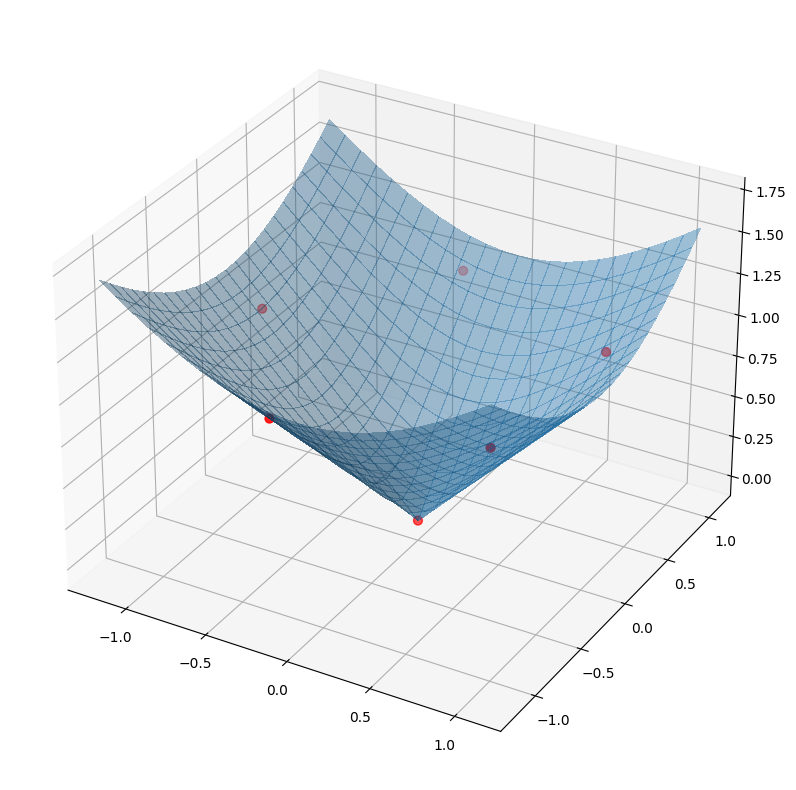

In [15]:
result = result.to_numpy().T

fig = plt.figure(figsize=((10,10)))
ax = fig.add_subplot(111, projection='3d')


# Make data.
X = np.arange(-1.2, 1.2, 0.1)
Y = np.arange(-1.2, 1.2, 0.1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = R

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=False, alpha=.4)

ax.scatter(
    xs=result[0],
    ys=result[1],
    zs=result[2],
    marker="o",
    s=40,
    color="red",
)

### Example 2: design on the surface of a cone / nonlinear equality

Because of missing sampling methods, nonlinear equalities are not supported at the moment. A fallback for the case of missing sampling methods in opti must be provided.

In [ ]:
# TODO: add example after solving the sampling issue.